# Exploratory Data Analysis with SQL

The purpose here is to use some queries to explore the data.


In [2]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Sqlite is a library that implements a SQL database engine. 
import sqlite3
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#connection
conn = sqlite3.connect('database.sqlite')
cursor = conn.cursor()

In [41]:
#sqlite_master is a table with database schema
query = """SELECT tbl_name AS 'Table Name' FROM sqlite_master WHERE type='table'"""
result = pd.read_sql_query(query, conn) 
result

,Table Name
0,Country
1,CountryNotes
2,Series
3,Indicators
4,SeriesNotes
5,Footnotes


## <span style='color:DarkGoldenrod'> Let's explore the Indicators table.  </span>

# 1- Selecting

In [12]:
# check the head
query = """
        SELECT * 
        FROM Indicators
"""
result = pd.read_sql_query(query, conn)
result.head()


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [17]:
# how many rows?
query = "SELECT COUNT(*) FROM Indicators;"
result = pd.read_sql_query(query, conn)
print('Indicators table has', result.iloc[0,0], 'rows.')


Indicators table has 5656458 rows.


In [27]:
# checking for missing values in one column
query = f"SELECT COUNT(*) AS Null_Indicators FROM Indicators WHERE IndicatorName IS NULL"
result = pd.read_sql_query(query, conn)
result

,Null_Indicators
0,0


In [25]:
# if I need filter not null
query = "SELECT * FROM Indicators WHERE IndicatorName IS NOT NULL;"
result = pd.read_sql_query(query, conn)
result.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [30]:
# checking for missing values in all columns
columns = """SELECT name FROM PRAGMA_TABLE_INFO("Indicators");"""
columns = pd.read_sql_query(columns, conn)
columns_namnes = columns['name'].values.tolist()
print(columns_namnes)
columns_has_null = []
for column in columns_namnes:
    query = f"SELECT COUNT(*) FROM Indicators WHERE {column} IS NULL"
    result = pd.read_sql_query(query, conn)
    if result.iloc[0,0] > 0:
        columns_has_null.append(column)
print(columns_has_null)

['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode', 'Year', 'Value']
[]


In [38]:
# how many indicators?
query = "SELECT COUNT(DISTINCT IndicatorCode) AS Indicators_Count FROM indicators"
result = pd.read_sql_query(query, conn) 
result

,Indicators_Count
0,1344


In [37]:
# selecting distinct indicators
query = "SELECT DISTINCT IndicatorCode, IndicatorName FROM Indicators"
result = pd.read_sql_query(query, conn) 
result

,IndicatorCode,IndicatorName
0,AG.AGR.TRAC.NO,"Agricultural machinery, tractors"
1,AG.CON.FERT.PT.ZS,Fertilizer consumption (% of fertilizer produc...
2,AG.CON.FERT.ZS,Fertilizer consumption (kilograms per hectare ...
3,AG.LND.AGRI.K2,Agricultural land (sq. km)
4,AG.LND.AGRI.ZS,Agricultural land (% of land area)
...,...,...
1339,per_sa_allsa.ben_q1_tot,Benefits incidence in poorest quintile (%) - A...
1340,per_sa_allsa.cov_pop_tot,Coverage (%) - All Social Assistance
1341,per_si_allsi.adq_pop_tot,Adequacy of social insurance programs (% of to...
1342,per_si_allsi.ben_q1_tot,Benefits incidence in poorest quintile (%) - A...


# 2- Filtering

In [39]:
# I wanna search for some indicator about GDP
query = "SELECT IndicatorName, IndicatorCode FROM Indicators WHERE IndicatorName LIKE '%GDP%'"
result = pd.read_sql_query(query, conn)
result


,IndicatorName,IndicatorCode
0,Merchandise trade (% of GDP),TG.VAL.TOTL.GD.ZS
1,GDP at market prices (current US$),NY.GDP.MKTP.CD
2,GDP per capita (current US$),NY.GDP.PCAP.CD
3,Merchandise trade (% of GDP),TG.VAL.TOTL.GD.ZS
4,CO2 emissions (kg per 2005 US$ of GDP),EN.ATM.CO2E.KD.GD
...,...,...
472308,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS
472309,"PPP conversion factor, GDP (LCU per internatio...",PA.NUS.PPP
472310,Price level ratio of PPP conversion factor (GD...,PA.NUS.PPPC.RF
472311,"Services, etc., value added (% of GDP)",NV.SRV.TETC.ZS


In [46]:
# how about GDP per capita of Brazil in last years ?
query = "SELECT * FROM Indicators WHERE IndicatorName = 'GDP per capita (current US$)' AND CountryName = 'Brazil' AND Year >= 2006 ORDER BY Year DESC"
result = pd.read_sql_query(query, conn)
result

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,11384.415010
1,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,11711.004405
2,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2012,11922.513058
3,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2011,13042.421933
4,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2010,11124.245780
5,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2009,8462.508346
6,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2008,8700.455202
7,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2007,7240.923983
8,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2006,5809.189096


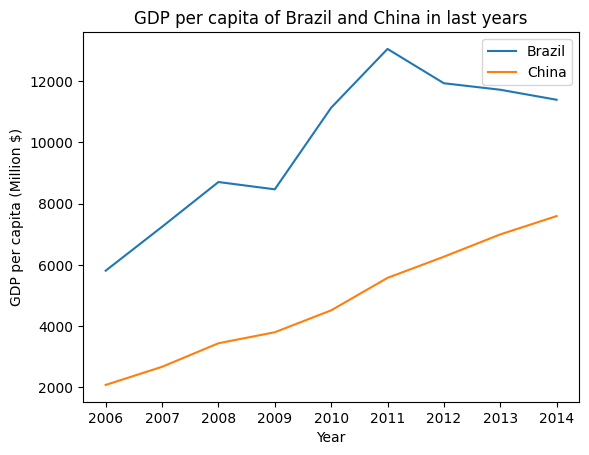

In [77]:
# let's  compare with China
query = "SELECT * FROM Indicators WHERE IndicatorName = 'GDP per capita (current US$)' AND CountryName IN ('China', 'Brazil') AND Year >= 2006 ORDER BY Year DESC"
result = pd.read_sql_query(query, conn)
result
# Now we have the data for GDP per capita of Brazil and China in last years. Let's compare them on a line chart plot.
# First, let's create a new dataframe with the data for China and Brazil and valures rounded to 2 decimal places
df = result[result['CountryName'].isin(['Brazil', 'China'])]
data = df.groupby(['Year', 'CountryName'])['Value'].mean().unstack().round(2)
gdp_per_capita = pd.DataFrame(data)
gdp_per_capita
# Now, let's create a line chart plot to compare the GDP per capita of Brazil and China in last years.
import matplotlib.pyplot as plt
gdp_per_capita.plot(kind='line')
plt.title('GDP per capita of Brazil and China in last years')
plt.xlabel('Year')
plt.ylabel('GDP per capita (Million $)')
plt.legend(['Brazil', 'China'])
plt.show()

In [71]:
# let's check the 90's in Brazil
query = "SELECT * FROM Indicators WHERE IndicatorName = 'GDP per capita (current US$)' AND CountryName = 'Brazil' AND Year BETWEEN 1990 AND 1999 ORDER BY Year DESC"
result = pd.read_sql_query(query, conn)
result


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1999,3476.144038
1,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1998,5083.700964
2,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1997,5279.111298
3,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1996,5163.265813
4,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1995,4827.152443
5,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1994,3482.529816
6,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1993,2774.174127
7,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1992,2578.207009
8,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1991,3942.403941
9,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1990,3071.627953


In [76]:
# let's check other countries in 2014
query = """ SELECT * FROM Indicators WHERE IndicatorName = 'GDP per capita (current US$)' AND Year = 2014 AND CountryName NOT IN ('Brazil', 'China') ORDER BY Value DESC"""
result = pd.read_sql_query(query, conn) 
result

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Luxembourg,LUX,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,116664.262488
1,Norway,NOR,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,97307.421592
2,Qatar,QAT,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,96732.402545
3,"Macao SAR, China",MAC,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,96038.050724
4,Switzerland,CHE,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,85594.326601
...,...,...,...,...,...,...
208,"Congo, Dem. Rep.",ZAR,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,442.339539
209,Niger,NER,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,427.373240
210,Central African Republic,CAF,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,358.537836
211,Burundi,BDI,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,286.002336


# 3- Aggregating and Summarizing

In [83]:
# let's search for the highest GDP per capita in 2014
query = "SELECT CountryName, IndicatorName, Year, MAX(Value) AS HighestGDP FROM Indicators WHERE IndicatorName = 'GDP per capita (current US$)' AND Year = 2014"
result = pd.read_sql_query(query, conn)
result


,CountryName,IndicatorName,Year,HighestGDP
0,Luxembourg,GDP per capita (current US$),2014,116664.262488


In [85]:
#Let's order (and reafirm the highest GDP per capita)
query = "SELECT CountryName, IndicatorName, Year, Value AS HighestGDP FROM Indicators WHERE IndicatorName = 'GDP per capita (current US$)' AND Year = 2014 ORDER BY Value DESC;"
result = pd.read_sql_query(query, conn)
result

,CountryName,IndicatorName,Year,HighestGDP
0,Luxembourg,GDP per capita (current US$),2014,116664.262488
1,Norway,GDP per capita (current US$),2014,97307.421592
2,Qatar,GDP per capita (current US$),2014,96732.402545
3,"Macao SAR, China",GDP per capita (current US$),2014,96038.050724
4,Switzerland,GDP per capita (current US$),2014,85594.326601
...,...,...,...,...
210,"Congo, Dem. Rep.",GDP per capita (current US$),2014,442.339539
211,Niger,GDP per capita (current US$),2014,427.373240
212,Central African Republic,GDP per capita (current US$),2014,358.537836
213,Burundi,GDP per capita (current US$),2014,286.002336


In [86]:
# Let's compare the averages
query = "SELECT CountryName, IndicatorName, AVG(Value) AS HighestGDP FROM Indicators WHERE IndicatorName = 'GDP per capita (current US$)' GROUP BY CountryName;"
result = pd.read_sql_query(query, conn)
result


,CountryName,IndicatorName,HighestGDP
0,Afghanistan,GDP per capita (current US$),253.948534
1,Albania,GDP per capita (current US$),1893.266623
2,Algeria,GDP per capita (current US$),1964.687652
3,Andorra,GDP per capita (current US$),19981.425118
4,Angola,GDP per capita (current US$),1736.088672
...,...,...,...
234,West Bank and Gaza,GDP per capita (current US$),1752.297159
235,World,GDP per capita (current US$),4019.677734
236,"Yemen, Rep.",GDP per capita (current US$),738.636427
237,Zambia,GDP per capita (current US$),583.761921


In [87]:
#how many measures during this time?
query = "SELECT CountryName, COUNT(*) AS Measures FROM Indicators WHERE IndicatorName = 'GDP per capita (current US$)' GROUP BY CountryName ORDER BY Measures DESC;"
result = pd.read_sql_query(query, conn)
result


,CountryName,Measures
0,Zimbabwe,55
1,Zambia,55
2,World,55
3,Uruguay,55
4,Upper middle income,55
...,...,...
234,Channel Islands,10
235,South Sudan,7
236,Myanmar,3
237,Somalia,2


In [88]:
# important to know that Angola has less measures during this time
query = "SELECT CountryName, COUNT(*) AS Measures FROM Indicators WHERE IndicatorName = 'GDP per capita (current US$)' AND CountryName = 'Angola' ORDER BY Measures DESC;"
result = pd.read_sql_query(query, conn)
result


,CountryName,Measures
0,Angola,29


# 4- JOINs

In [97]:
# let's make a join to get the information about indicators GDP related measured in 2014 in Brazil
# def get_table_sample(table_name):
#     query = f"SELECT * FROM {table_name} LIMIT 5"
#     return query
# for table_name in tables:
#     print(f"Table: {table_name}")
#     q = get_table_sample(table_name)
#     res = pd.read_sql_query(q, conn)
#     print(res)
#     print("**"*50)
query = """
SELECT *
FROM Indicators i
LEFT JOIN Series s ON i.IndicatorName = s.IndicatorName
WHERE i.IndicatorName LIKE '%GDP%' AND i.CountryName = 'Brazil' AND i.Year = 2014
"""
res = pd.read_sql_query(query, conn)
res

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value,SeriesCode,Topic,IndicatorName,ShortDefinition,...,LimitationsAndExceptions,NotesFromOriginalSource,GeneralComments,Source,StatisticalConceptAndMethodology,DevelopmentRelevance,RelatedSourceLinks,OtherWebLinks,RelatedIndicators,LicenseType
0,Brazil,BRA,"Agriculture, value added (% of GDP)",NV.AGR.TOTL.ZS,2014,5.559470e+00,NV.AGR.TOTL.ZS,Economic Policy & Debt: National accounts: Sha...,"Agriculture, value added (% of GDP)",,...,Among the difficulties faced by compilers of n...,,Note: Data for OECD countries are based on ISI...,"World Bank national accounts data, and OECD Na...",Gross domestic product (GDP) represents the su...,,,,,Open
1,Brazil,BRA,Broad money (% of GDP),FM.LBL.BMNY.GD.ZS,2014,7.963235e+01,FM.LBL.BMNY.GD.ZS,Financial Sector: Monetary holdings (liabilities),Broad money (% of GDP),,...,,,The derivation of this indicator was simplifie...,"International Monetary Fund, International Fin...",,,,,,Open
2,Brazil,BRA,"Claims on central government, etc. (% GDP)",FS.AST.CGOV.GD.ZS,2014,2.696441e+01,FS.AST.CGOV.GD.ZS,Financial Sector: Assets,"Claims on central government, etc. (% GDP)",,...,,,,"International Monetary Fund, International Fin...",,,,,,Open
3,Brazil,BRA,Claims on other sectors of the domestic econom...,FS.AST.DOMO.GD.ZS,2014,8.130407e+01,FS.AST.DOMO.GD.ZS,Financial Sector: Assets,Claims on other sectors of the domestic econom...,,...,,,,"International Monetary Fund, International Fin...",,,,,,Open
4,Brazil,BRA,Current account balance (% of GDP),BN.CAB.XOKA.GD.ZS,2014,-4.432124e+00,BN.CAB.XOKA.GD.ZS,Economic Policy & Debt: Balance of payments: C...,Current account balance (% of GDP),,...,,,Note: Data are based on the sixth edition of t...,"International Monetary Fund, Balance of Paymen...",,,,,,Open
5,Brazil,BRA,Discrepancy in expenditure estimate of GDP (cu...,NY.GDP.DISC.CN,2014,0.000000e+00,NY.GDP.DISC.CN,Economic Policy & Debt: National accounts: Loc...,Discrepancy in expenditure estimate of GDP (cu...,,...,,,,"World Bank national accounts data, and OECD Na...",,,,,,Open
6,Brazil,BRA,Domestic credit provided by financial sector (...,FS.AST.DOMS.GD.ZS,2014,1.082685e+02,FS.AST.DOMS.GD.ZS,Financial Sector: Assets,Domestic credit provided by financial sector (...,,...,In a few countries governments may hold intern...,,,"International Monetary Fund, International Fin...",Domestic credit provided by the financial sect...,Both banking and financial systems enhance gro...,,,,Open
7,Brazil,BRA,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,2014,6.911030e+01,FS.AST.PRVT.GD.ZS,Financial Sector: Assets,Domestic credit to private sector (% of GDP),,...,Credit to the private sector may sometimes inc...,,,"International Monetary Fund, International Fin...",Credit is an important link in money transmiss...,Private sector development and investment - ta...,,,,Open
8,Brazil,BRA,Domestic credit to private sector by banks (% ...,FD.AST.PRVT.GD.ZS,2014,6.911030e+01,FD.AST.PRVT.GD.ZS,Financial Sector: Assets,Domestic credit to private sector by banks (% ...,,...,Credit to the private sector may sometimes inc...,,,"International Monetary Fund, International Fin...",Credit is an important link in money transmiss...,Private sector development and investment - ta...,,,,Open
9,Brazil,BRA,Exports of goods and services (% of GDP),NE.EXP.GNFS.ZS,2014,1.151749e+01,NE.EXP.GNFS.ZS,Economic Policy & Debt: National accounts: Sha...,Exports of goods and services (% of GDP),,...,Because policymakers have tended to focus on f...,,,"World Bank national accounts data, and OECD Na...",Gross domestic product (GDP) from the expendit...,,,,,Open


# 5- Using CASE WHEN

CASE statements are like "IF this THEN that".  
Here I'm going to use CASE statements for a custom discretization.

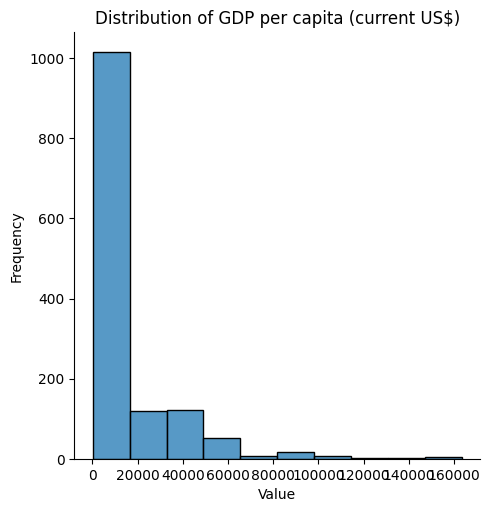

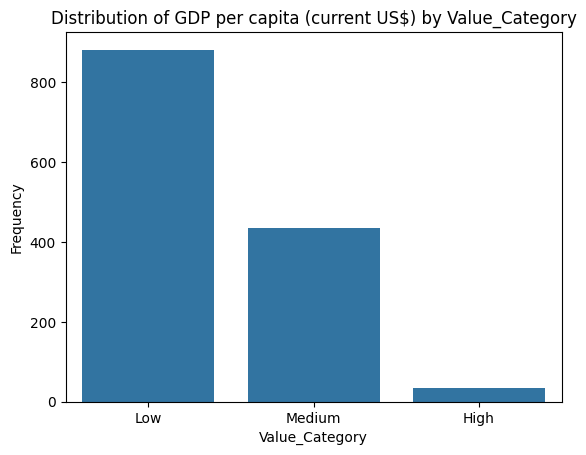

In [109]:
# I'm using arbitrary values, this is an exercise with didactic purposes: cuts on 10000 and 80000
# I'll make it for specific period cause of time - last 5 years for example
query = """
        SELECT *,
        CASE WHEN Value < 10000 THEN 'Low'
             WHEN Value BETWEEN 10000 AND 80000 THEN 'Medium'
             ELSE 'High'
        END AS Value_Category
        FROM Indicators
        WHERE Year BETWEEN 2009 AND 2014 AND IndicatorName = 'GDP per capita (current US$)';
        """
result = pd.read_sql_query(query, conn)
result
# let's do some custom discretization for the GDP per capita indicator using charts and graphs
sns.displot(result['Value'], bins=10, kde=False)
plt.title('Distribution of GDP per capita (current US$)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
# Another one in terms of category
sns.countplot(x='Value_Category', data=result)
plt.title('Distribution of GDP per capita (current US$) by Value_Category')
plt.xlabel('Value_Category')
plt.ylabel('Frequency')
plt.show()


# 6 - Window Function
With a window function, we can make calculations across rows "in a window" and return a value for each row.
This window can be, for example, grouped sets based on another column or even an ordered set.

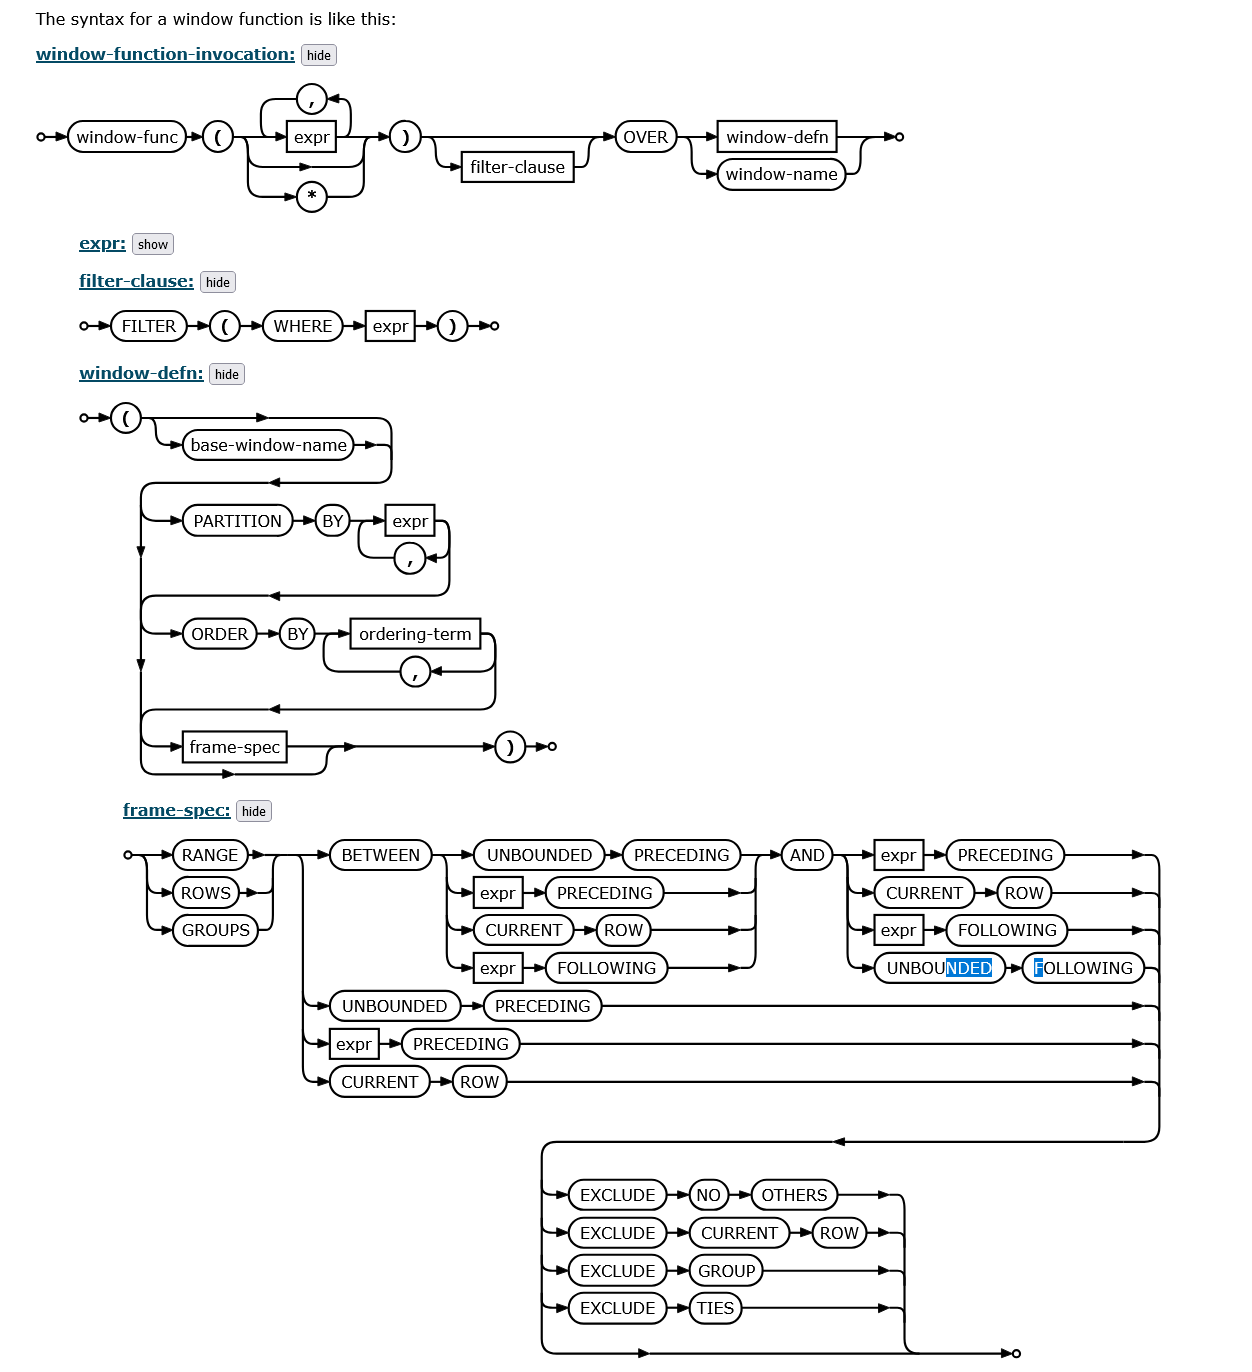

In [ ]:
# adding the mean of last 3 years using window function
query = """
        SELECT *, (AVG(Value) OVER (PARTITION BY CountryName)) AS mean_last_3_years
        FROM Indicators
        WHERE IndicatorName = 'GDP per capita (current US$)'
        AND Year IN (2014, 2013, 2012);
        """
result = pd.read_sql_query(query, conn)
result


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value,mean_last_3_years
0,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,2012,690.842629,663.735642
1,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,666.795051,663.735642
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,633.569247,663.735642
3,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,2012,4247.485437,4407.711339
4,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,4411.258241,4407.711339
...,...,...,...,...,...,...,...
659,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,1759.192902,1722.478067
660,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,1721.623274,1722.478067
661,Zimbabwe,ZWE,GDP per capita (current US$),NY.GDP.PCAP.CD,2012,850.827694,895.842068
662,Zimbabwe,ZWE,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,905.500322,895.842068


# 7 - Common Table Expression (CTE)
A CTE will save results of a query temporary. It can help simplifying some queries and, for example, can also help filtering based on ranking results. 

In [127]:
# the first place from each year
query = """ 
        WITH first_place_by_year AS (
            SELECT *, RANK() OVER (PARTITION BY Year ORDER BY Value DESC) AS place
            FROM Indicators
            WHERE IndicatorName = 'GDP per capita (current US$)'
            AND Year IN (2014, 2013, 2012)
        )

        SELECT *
        FROM first_place_by_year
        WHERE place = 1;
        """
result = pd.read_sql_query(query, conn)
result


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value,place
0,Liechtenstein,LIE,GDP per capita (current US$),NY.GDP.PCAP.CD,2012,149160.758132,1
1,Luxembourg,LUX,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,113726.638979,1
2,Luxembourg,LUX,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,116664.262488,1


In [128]:
conn.close()    